In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_pickle("../data/multi_label_train_v0.3.pkl")
df

,url,incidents,places,image_id,downloadable,incidents_list,places_list
0,https://localtvwtkr.files.wordpress.com/2018/0...,"{'snow covered': 1, 'ice storm': 0, 'hailstorm...","{'parking lot': 0, 'building outdoor': 1}",404,False,snow covered,building outdoor
1,https://www.earthmagazine.org/sites/earthmagaz...,{'flooded': 1},"{'field': 0, 'street': 1, 'building outdoor': 0}",404,False,flooded,street
2,https://s-media-cache-ak0.pinimg.com/originals...,{'truck accident': 0},{},e6a54564-0082-4a26-9df4-13fe39f8ec15,True,unknown,unknown
3,https://m.gjcdn.net/screenshot-thumbnail/300x3...,{'hailstorm': 0},{},404,False,unknown,unknown
4,http://nnimgt-a.akamaihd.net/transform/v1/crop...,"{'blocked': 1, 'with smoke': 0, 'under constru...","{'construction site': 0, 'skyscraper': 0, 'dow...",400,False,blocked,"downtown, building outdoor"
...,...,...,...,...,...,...,...
1608667,https://upload.wikimedia.org/wikipedia/commons...,{'fog': 1},"{'street': 0, 'forest': 0}",403,False,fog,unknown
1608668,http://images.newindianexpress.com/uploads/use...,{'snow covered': 1},"{'port': 0, 'ocean': 0, 'glacier': 0, 'coast': 1}",93c26672-dba8-4f3c-ab66-9a426c9b05f8,True,snow covered,coast
1608669,https://savepetesharbor.files.wordpress.com/20...,"{'flooded': 0, 'under construction': 0}",{},aee52b54-05cc-444b-b410-e5b0ef870c74,True,unknown,unknown
1608670,https://i1.ytimg.com/vi/pdyzTYH1L5Q/hqdefault.jpg,{'on fire': 1},"{'industrial area': 1, 'downtown': 0, 'buildin...",c21faea6-5060-4f3f-9d2e-a8b65cfa0f74,True,on fire,industrial area


TODO

- Incident vs place heatmap
- Incident vs incident
- Top 10 incident/place
- Subsample and maintain distribution
- Rename images according to key

In [5]:
df[(df["incidents_list"] == "unknown") | (df["places_list"] == "unknown")]

,url,incidents,places,image_id,downloadable,incidents_list,places_list
2,https://s-media-cache-ak0.pinimg.com/originals...,{'truck accident': 0},{},e6a54564-0082-4a26-9df4-13fe39f8ec15,True,unknown,unknown
3,https://m.gjcdn.net/screenshot-thumbnail/300x3...,{'hailstorm': 0},{},404,False,unknown,unknown
8,https://www.storm-solutions.net/hs-fs/hubfs/At...,"{'mudslide mudflow': 0, 'flooded': 0, 'dirty c...",{},cfebd146-2eaa-422c-b86a-0f64a571573b,True,unknown,unknown
10,http://www.taipeitimes.com/images/2018/02/20/P...,{'car accident': 0},{},0f8c297e-f081-4da0-9e3d-0fef1108c124,True,unknown,unknown
13,https://ae01.alicdn.com/kf/HTB1KKYMRVXXXXcwXpX...,"{'tropical cyclone': 1, 'storm surge': 0, 'sno...",{'mountain': 0},fb631c63-75bd-4bcf-ac4c-d3b7f0ab1b90,True,"tropical cyclone, dust sand storm, derecho",unknown
...,...,...,...,...,...,...,...
1608660,https://wanderlustmarriage.com/wp-content/uplo...,{'blocked': 0},{},e43e7d4a-8278-42de-8bf3-32dbb46b7b1e,True,unknown,unknown
1608663,https://as2.ftcdn.net/jpg/02/20/19/01/500_F_22...,{'fog': 0},{},d0a51563-0ba0-4595-bc41-07e43f273aa8,True,unknown,unknown
1608664,http://mediad.publicbroadcasting.net/p/wrni/fi...,{'ice storm': 0},{},860145f8-423b-495f-8ac4-608ce4db4abb,True,unknown,unknown
1608667,https://upload.wikimedia.org/wikipedia/commons...,{'fog': 1},"{'street': 0, 'forest': 0}",403,False,fog,unknown


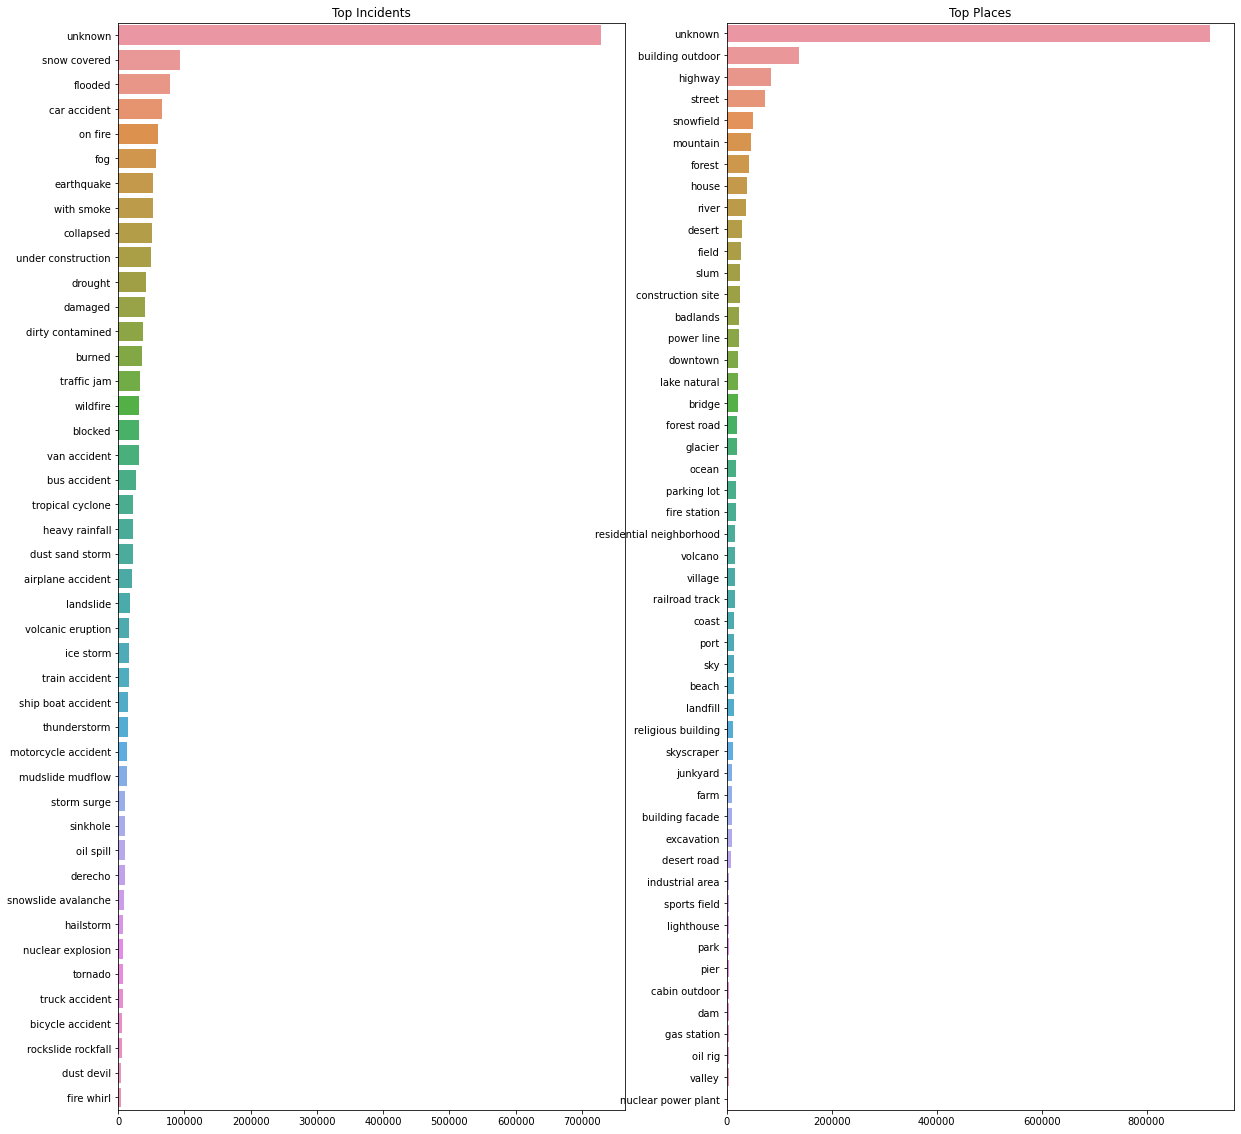

In [6]:
# Get the counts of each incident and place by splitting the string with ", "
# and then counting the number of times each incident or place appears
incidents = df["incidents_list"].str.split(", ").explode().value_counts()
places = df["places_list"].str.split(", ").explode().value_counts()

# Plot the top 10 incidents and places
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 2, figsize=(20, 20))
sns.barplot(x=incidents.values, y=incidents.index, ax=ax[0])
sns.barplot(x=places.values, y=places.index, ax=ax[1])
ax[0].set_title("Top Incidents")
ax[1].set_title("Top Places")
plt.show()



In [6]:
# Filter out rows where image_id is a number
filtered_df = df[df.image_id.str.isnumeric() == False].copy()
filtered_df

filtered_df["incidents list"] = filtered_df["incidents"].apply(lambda x: ", ".join([k for k, v in dict(x).items() if v == 1]))
filtered_df["incidents list"] = filtered_df["incidents list"].replace("", "unknown")

filtered_df_2 = filtered_df.head(3).copy()
filtered_df_2

# Add new rows to the dataframe from incidents list
df_tmp = pd.concat([filtered_df_2, filtered_df_2["incidents list"].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).rename("incidents list")], axis=1)
df_tmp

KeyError: 'incidents'

In [ ]:
df["Number of known incidents"] = df.incidents.apply(lambda x: len({k: v for k, v in dict(x).items() if v == 1}))
df["Number of unknown incidents"] = df.incidents.apply(lambda x: len({k: v for k, v in dict(x).items() if v == 0}))

df["Number of known places"] = df.places.apply(lambda x: len({k: v for k, v in dict(x).items() if v == 1}))
df["Number of unknown places"] = df.places.apply(lambda x: len({k: v for k, v in dict(x).items() if v == 0}))

total_known_incidents = df["Number of known incidents"].sum()
total_unknown_incidents = df["Number of unknown incidents"].sum()

total_known_places = df["Number of known places"].sum()
total_unknown_places = df["Number of unknown places"].sum()

print("Total known incidents: ", total_known_incidents)
print("Total unknown incidents: ", total_unknown_incidents)

print("Total known places: ", total_known_places)
print("Total unknown places: ", total_unknown_places)



In [ ]:
df[(df["Number of known incidents"] == 0) | (df["Number of known places"] == 0)]

df["Total images saved"] = df["Number of known incidents"] + df["Number of known places"] + \
    (df["Number of known incidents"] == 0) * 1 + (df["Number of known places"] == 0) * 1

total_images_saved = df["Total images saved"].sum()
print("Total images saved: ", total_images_saved)

df
